In [1]:
from __future__ import print_function
import sys
%matplotlib inline
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
train_df= pd.read_csv("house-prices/train.csv")
test_df= pd.read_csv("house-prices/test.csv")

Drop the "id" column

In [4]:
train_df.drop('Id', axis = 1, inplace = True)
test_df.drop('Id', axis = 1, inplace = True)

In [5]:
train_df.shape, test_df.shape

((1460, 80), (1459, 79))

### Columns in train data with missing values

total no of coulmns with null entries: 19


Text(0.5,1,'train data missing values')

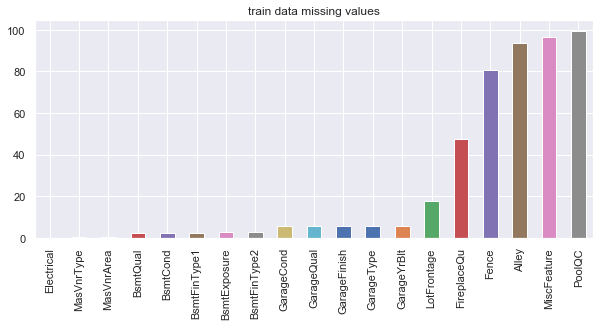

In [6]:
data_with_missing_values=(train_df.isnull().sum()/train_df.shape[0])*100
null = data_with_missing_values[data_with_missing_values > 0]
print("total no of coulmns with null entries:",len(null))
plt.figure(figsize=(10,4))
null.sort_values().plot.bar()
plt.title('train data missing values')

### Columns in test data with missing values

total no of coulmns with null entries: 33


Text(0.5,1,'test data missing values')

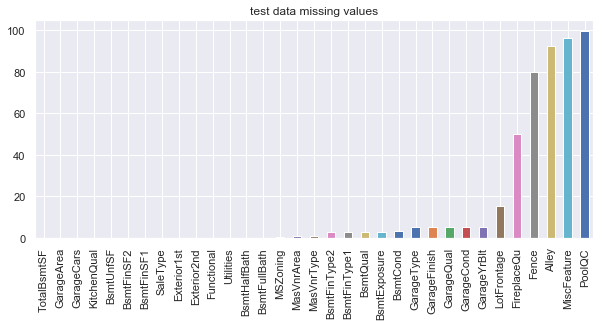

In [7]:
data_with_missing_values=(test_df.isnull().sum()/test_df.shape[0])*100
null = data_with_missing_values[data_with_missing_values > 0]
print("total no of coulmns with null entries:",len(null))
plt.figure(figsize=(10,4))
null.sort_values().plot.bar()
plt.title('test data missing values')

 Before dropping any column, first we see teh correlation of the features between Saleprice

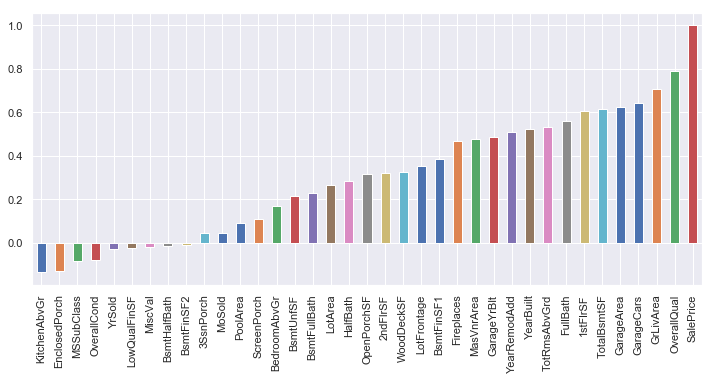

In [8]:
corr=train_df.corr()["SalePrice"]
plt.figure(figsize=(12,5))
corr.sort_values().plot.bar()

The most null value columns are PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage.
But LotFrontage has decent correlation with Saleprice. Let's see correlation between LotArea and LotFrontage.

In [9]:
train_df['LotFrontage'].corr(train_df['LotArea'])

0.42609501877180816

'LotFrontage' and 'LotArea' are correlated. 'LotFrontage' has many null values,
where LotArea no null value. So we can drop 'LotFrontage'

In [10]:
train_df.drop(['MiscFeature','PoolQC','Alley','Fence','FireplaceQu','LotFrontage'], \
              axis=1,inplace=True)

In [12]:
train_df.shape

(1460, 74)

#### Fill missing values in column with categorical data  with "None"

In [11]:
cat_col =list(train_df.select_dtypes(exclude=[np.int64, np.float, np.bool]).columns.values)
train_df[cat_col] = train_df[cat_col].apply(lambda x: x.fillna("None"),axis=0)

In [13]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [14]:
train_df["SalePrice"].corr(train_df["MasVnrArea"]),\
train_df["SalePrice"].corr(train_df["GarageYrBlt"])

(0.477493047095716, 0.4863616774878608)

#### Fill missing values in column with numerical data  with "None"

In [15]:
num_col = list(train_df.select_dtypes(include=[np.int, np.float]).columns.values)
train_df[num_col] = train_df[num_col].apply(lambda x: x.fillna(x.median()),axis=0)

##### Confirming no missing values in train data frame

In [16]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

##### Save a new no null training df in csv file for data analysis, model fitting

In [17]:
train_df.to_csv("house-prices/train_no_null.csv")

### Do the same operation for test

In [18]:
test_df.drop(['MiscFeature','PoolQC','Alley','Fence','FireplaceQu','LotFrontage'], \
              axis=1,inplace=True)
cat_col =list(test_df.select_dtypes(exclude=[np.int64, np.float, np.bool]).columns.values)
test_df[cat_col] = test_df[cat_col].apply(lambda x: x.fillna("None"),axis=0)
num_col = list(test_df.select_dtypes(include=[np.int, np.float]).columns.values)
test_df[num_col] = train_df[num_col].apply(lambda x: x.fillna(x.median()),axis=0)

##### Confirming no missing value in test data frame

In [19]:
test_df.isnull().sum()[test_df.isnull().sum() > 0]

Series([], dtype: int64)

##### Save a new no null training df in csv file for data analysis, model fitting

In [21]:
test_df.to_csv("house-prices/test_no_null.csv")